In [22]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import SGD
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
rawdata = pd.read_csv('data/bitcoin.csv',usecols=[8])

print(rawdata.shape[0])
X = rawdata.head(rawdata.shape[0] - 5)
Y = rawdata.tail(rawdata.shape[0] - 5)

(1745, 1)
[    close
0  134.21
1  144.54
2  139.00
3  116.99
4  105.21,     close
1  144.54
2  139.00
3  116.99
4  105.21
5   97.75,     close
2  139.00
3  116.99
4  105.21
5   97.75
6  112.50,     close
3  116.99
4  105.21
5   97.75
6  112.50
7  115.91,     close
4  105.21
5   97.75
6  112.50
7  115.91
8  112.30,     close
5   97.75
6  112.50
7  115.91
8  112.30
9  111.50,      close
6   112.50
7   115.91
8   112.30
9   111.50
10  113.57,      close
7   115.91
8   112.30
9   111.50
10  113.57
11  112.67,      close
8   112.30
9   111.50
10  113.57
11  112.67
12  117.20,      close
9   111.50
10  113.57
11  112.67
12  117.20
13  115.24,      close
10  113.57
11  112.67
12  117.20
13  115.24
14  115.00,      close
11  112.67
12  117.20
13  115.24
14  115.00
15  117.98,      close
12  117.20
13  115.24
14  115.00
15  117.98
16  111.50,      close
13  115.24
14  115.00
15  117.98
16  111.50
17  114.22,      close
14  115.00
15  117.98
16  111.50
17  114.22
18  118.76,      close
15  117.9

In [ ]:
rawdata = pd.read_csv('data/bitcoin.csv',usecols=[8])

print(rawdata.shape)

dataframes = [];

for i in range(rawdata.shape[0]-5):
    dataframes.append(rawdata.head(5 + i).tail(5))
    
X = rawdata.head(10).tail(5)
Y = rawdata.tail(rawdata.shape[0] - 5)
print(dataframes)

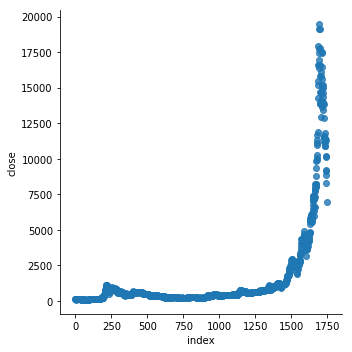

In [19]:
sns.lmplot('index','close', data=rawdata.reset_index(),fit_reg=False)
plt.show()

In [29]:
model = Sequential()
model.add(Dense(1,input_shape=(1,)))
model.add(Activation('relu'))

sgd = SGD(0.02)

model.compile(loss='msle',optimizer=sgd,
             metrics=['msle'])

H = model.fit(X,Y,nb_epoch=3)

/usr/local/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/3
1740/1740 [==============================] - 1s 322us/step - loss: 0.0801 - mean_squared_logarithmic_error: 0.0801
Epoch 2/3
1740/1740 [==============================] - 0s 119us/step - loss: 0.0099 - mean_squared_logarithmic_error: 0.0099
Epoch 3/3
1740/1740 [==============================] - 0s 118us/step - loss: 0.0097 - mean_squared_logarithmic_error: 0.0097


In [30]:
XVal = pd.read_csv('data/trainsetX.csv',usecols=[8]).as_matrix()
model.predict(XVal)


array([[674.19507],
       [691.0403 ],
       [771.8425 ],
       [744.5843 ],
       [737.2506 ],
       [754.6934 ],
       [765.9168 ]], dtype=float32)